# JUPYTER NOTEBOOK FOR HOMEWORK 3
Using classifiers to identify very noisy images of faces with happy or sad expressions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from helper import y2indicator, getBinaryfer13Data, sigmoid, sigmoid_cost, error_rate, init_weight_and_bias

np.random.seed( 30 )

Shape of X: (12066, 2304)
Shape of Y: (12066,)


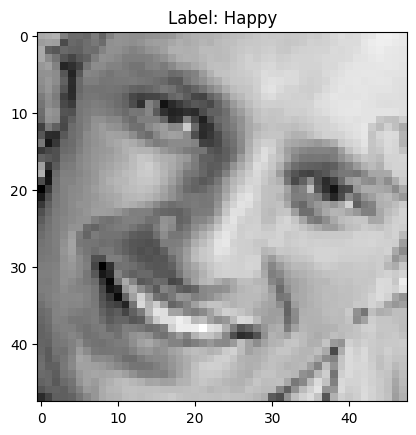

In [4]:
# Load the training data
X, Y = getBinaryfer13Data('fer3and4train.csv')

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# Let's look at one example image
plt.imshow(X[0].reshape(48, 48), cmap='gray')
plt.title(f"Label: {'Happy' if Y[0] == 1 else 'Sad'}")
plt.show()

# PART 1 - Logistic regressor

In [14]:
class LRClass(object):
    def __init__(self):
        # weights (W) and bias (b) start off empty
        self.W = None
        self.b = 0

    def train(self, X, Y, step_size=10e-7, epochs=10000):
        # shuffle the data and set aside 1000 examples for validation
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]
        N, D = X.shape
        
        # initialize small random weights and zero bias
        self.W, self.b = init_weight_and_bias(D, 1)
        
        # lists to keep track of how training and validation loss change
        train_costs = []
        valid_costs = []
        best_validation_error = 1
        
        # main training loop
        for i in range(epochs):
            # make predictions (forward pass)
            pY_train = self.forward(X)

            # compute gradients for weights and bias
            gradW = X.T.dot(pY_train - Y)
            gradb = (pY_train - Y).sum()

            # update weights and bias using gradient descent
            self.W -= step_size * gradW.reshape(self.W.shape)
            self.b -= step_size * gradb

            # evaluate the model on both training and validation data
            pY_valid = self.forward(Xvalid)

            # calculate current loss (how wrong the model is)
            train_cost = sigmoid_cost(Y, pY_train)
            valid_cost = sigmoid_cost(Yvalid, pY_valid)
            train_costs.append(train_cost)
            valid_costs.append(valid_cost)

            # track how many validation samples are predicted incorrectly
            valid_error = error_rate(Yvalid, np.round(pY_valid))
            if valid_error < best_validation_error:
                best_validation_error = valid_error

            # print progress every 100 epochs
            if i % 100 == 0:
                print(f"epoch {i}: train_cost={train_cost:.4f}, "
                      f"valid_cost={valid_cost:.4f}, valid_error={valid_error:.4f}")
        
        # show the best validation result
        print("best_validation_error:", best_validation_error)
        
        # plot how the training and validation loss changed over time
        plt.plot(train_costs, label='train cost')
        plt.plot(valid_costs, label='validation cost')
        plt.xlabel("epoch")
        plt.ylabel("cost")
        plt.legend()
        plt.show()
    
    # given input data X, return predicted probabilities (forward pass)
    def forward(self, X):
        A = X.dot(self.W) + self.b
        return sigmoid(A).flatten()
    
    # turn probabilities into class labels (0 or 1)
    def predict(self, X):
        pY = self.forward(X)
        return np.round(pY)
    
    # compute accuracy as the fraction of correct predictions
    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

epoch 0: train_cost=7822.3605, valid_cost=704.4656, valid_error=0.5350
epoch 100: train_cost=7282.9975, valid_cost=665.1976, valid_error=0.3920
epoch 200: train_cost=7076.7706, valid_cost=644.9415, valid_error=0.3610
epoch 300: train_cost=6946.4435, valid_cost=631.7561, valid_error=0.3540
epoch 400: train_cost=6856.1427, valid_cost=622.4222, valid_error=0.3370
epoch 500: train_cost=6789.5202, valid_cost=615.4233, valid_error=0.3270
epoch 600: train_cost=6738.0228, valid_cost=609.9571, valid_error=0.3200
epoch 700: train_cost=6696.7545, valid_cost=605.5559, valid_error=0.3150
best_validation_error: 0.313


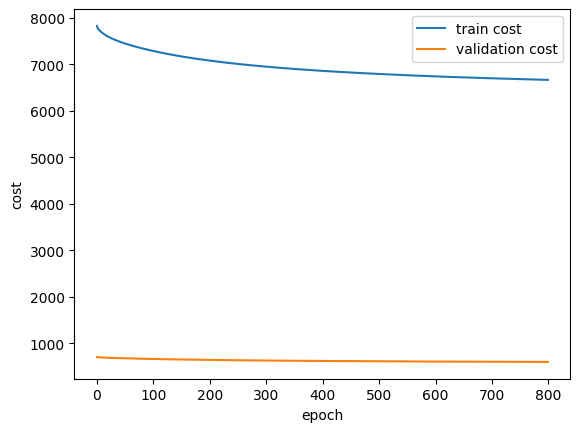

Accuracy of test set is: 0.6946666666666667


In [ ]:
#Call your logistic regression class and train your object
X, Y = getBinaryfer13Data('fer3and4train.csv')
lrObj = LRClass()
lrObj.train(X, Y, epochs = 800)

#After successfully training, apply the learned model on the test dataset
testX, testY = getBinaryfer13Data('fer3and4test.csv')
test_accuracy = lrObj.score(testX, testY)
print("Accuracy of test set is:", test_accuracy)

### BONUS

In [12]:
class LRClassReg(object):
    def __init__(self, lambda_reg=0.01):
        self.W = None
        self.b = 0
        self.lambda_reg = lambda_reg  # regularization strength

    def train(self, X, Y, step_size=10e-7, epochs=800):
        # Same data split as before
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]
        N, D = X.shape

        # Initialize weights and bias
        self.W, self.b = init_weight_and_bias(D, 1)

        train_costs = []
        valid_costs = []
        best_validation_error = 1

        for i in range(epochs):
            # Forward pass on training data
            pY_train = self.forward(X)

            # Gradients with L2 regularization
            gradW = X.T.dot(pY_train - Y) + self.lambda_reg * self.W
            gradb = (pY_train - Y).sum()

            # Update parameters
            self.W -= step_size * gradW
            self.b -= step_size * gradb

            # Forward on validation data
            pY_valid = self.forward(Xvalid)

            # Costs (now including L2 penalty in the training cost)
            train_cost = sigmoid_cost(Y, pY_train) / len(Y) + 0.5 * self.lambda_reg * np.sum(self.W * self.W)
            valid_cost = sigmoid_cost(Yvalid, pY_valid) / len(Yvalid)
            train_costs.append(train_cost)
            valid_costs.append(valid_cost)

            valid_error = error_rate(Yvalid, np.round(pY_valid))
            if valid_error < best_validation_error:
                best_validation_error = valid_error

            if i % 100 == 0:
                print(f"[REG] epoch {i}: train_cost={train_cost:.4f}, "
                      f"valid_cost={valid_cost:.4f}, valid_error={valid_error:.4f}")

        print("[REG] best_validation_error:", best_validation_error)

        # Plot
        plt.plot(train_costs, label='train cost (reg)')
        plt.plot(valid_costs, label='validation cost (reg)')
        plt.xlabel("epoch")
        plt.ylabel("cost")
        plt.legend()
        plt.show()

    def forward(self, X):
        A = X.dot(self.W) + self.b
        return sigmoid(A).flatten()

    def predict(self, X):
        pY = self.forward(X)
        return np.round(pY)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

[REG] epoch 0: train_cost=0.7477, valid_cost=0.6950, valid_error=0.4690
[REG] epoch 100: train_cost=0.6601, valid_cost=0.6482, valid_error=0.3300
[REG] epoch 200: train_cost=0.6430, valid_cost=0.6312, valid_error=0.3250
[REG] epoch 300: train_cost=0.6323, valid_cost=0.6204, valid_error=0.3110
[REG] epoch 400: train_cost=0.6249, valid_cost=0.6129, valid_error=0.3070
[REG] epoch 500: train_cost=0.6196, valid_cost=0.6073, valid_error=0.2980
[REG] epoch 600: train_cost=0.6155, valid_cost=0.6029, valid_error=0.2940
[REG] epoch 700: train_cost=0.6123, valid_cost=0.5994, valid_error=0.2870
[REG] best_validation_error: 0.286


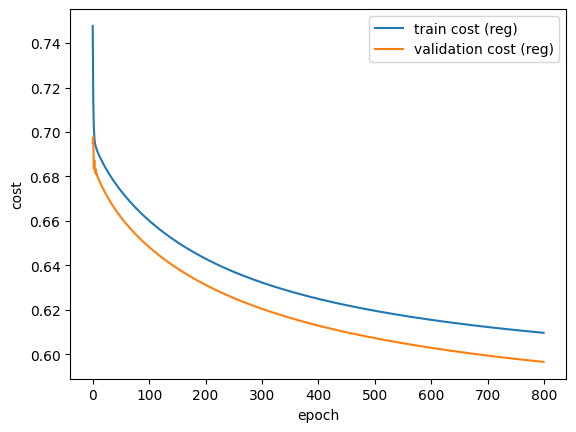

Test accuracy with L2 regularization: 0.7036666666666667


In [13]:
# Extra: Logistic regression with L2 regularization
X, Y = getBinaryfer13Data('fer3and4train.csv')
testX, testY = getBinaryfer13Data('fer3and4test.csv')

lrReg = LRClassReg(lambda_reg=0.01)
lrReg.train(X, Y, step_size=10e-7, epochs=800)

test_accuracy_reg = lrReg.score(testX, testY)
print("Test accuracy with L2 regularization:", test_accuracy_reg)

# PART 2 - SVM Classification

trainX: (12066, 2304) trainY: (12066,)
testX: (3000, 2304) testY: (3000,)
Xtr: (10256, 2304) Xval: (1810, 2304)

------------------------------------------------------------
SVM with linear kernel
------------------------------------------------------------
validation accuracy: 0.707
test accuracy:       0.663

confusion matrix (test):
[[ 798  442]
 [ 570 1190]]

classification report (test):
              precision    recall  f1-score   support

           0       0.58      0.64      0.61      1240
           1       0.73      0.68      0.70      1760

    accuracy                           0.66      3000
   macro avg       0.66      0.66      0.66      3000
weighted avg       0.67      0.66      0.66      3000



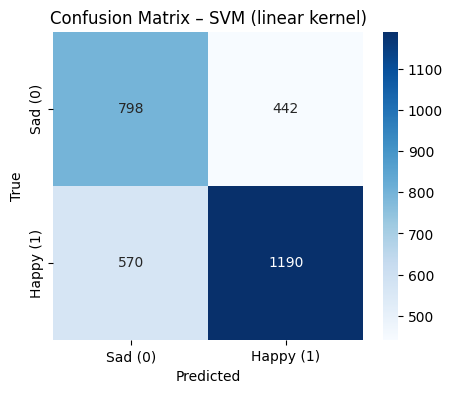


------------------------------------------------------------
SVM with rbf kernel
------------------------------------------------------------
validation accuracy: 0.762
test accuracy:       0.743

confusion matrix (test):
[[ 926  314]
 [ 458 1302]]

classification report (test):
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1240
           1       0.81      0.74      0.77      1760

    accuracy                           0.74      3000
   macro avg       0.74      0.74      0.74      3000
weighted avg       0.75      0.74      0.74      3000



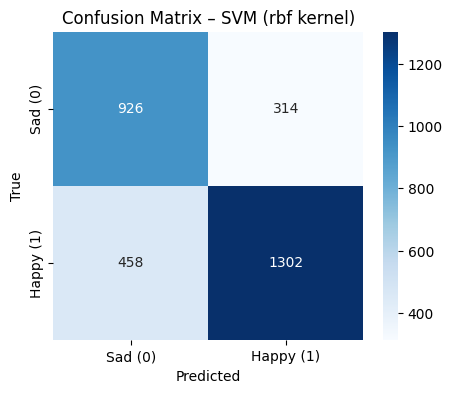


------------------------------------------------------------
SVM with poly kernel
------------------------------------------------------------
validation accuracy: 0.786
test accuracy:       0.726

confusion matrix (test):
[[ 899  341]
 [ 480 1280]]

classification report (test):
              precision    recall  f1-score   support

           0       0.65      0.72      0.69      1240
           1       0.79      0.73      0.76      1760

    accuracy                           0.73      3000
   macro avg       0.72      0.73      0.72      3000
weighted avg       0.73      0.73      0.73      3000



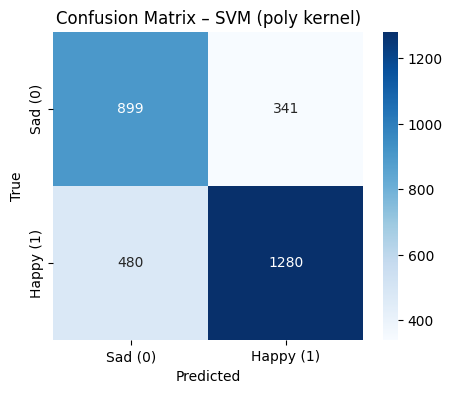

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

# load data
trainX, trainY = getBinaryfer13Data('fer3and4train.csv')
testX, testY   = getBinaryfer13Data('fer3and4test.csv')

print("trainX:", trainX.shape, "trainY:", trainY.shape)
print("testX:",  testX.shape,  "testY:",  testY.shape)

# split off a validation set from the training data
Xtr, Xval, Ytr, Yval = train_test_split(
    trainX, trainY,
    test_size=0.15,
    random_state=30,
    stratify=trainY
)

print("Xtr:", Xtr.shape, "Xval:", Xval.shape)


def run_svm(kernel, **kwargs):
    print("\n" + "-"*60)
    print(f"SVM with {kernel} kernel")
    print("-"*60)

    clf = SVC(kernel=kernel, **kwargs)
    clf.fit(Xtr, Ytr)

    # validation
    val_pred = clf.predict(Xval)
    val_acc = accuracy_score(Yval, val_pred)
    print(f"validation accuracy: {val_acc:.3f}")

    # test
    test_pred = clf.predict(testX)
    test_acc = accuracy_score(testY, test_pred)
    print(f"test accuracy:       {test_acc:.3f}")

    print("\nconfusion matrix (test):")
    print(confusion_matrix(testY, test_pred))

    print("\nclassification report (test):")
    print(classification_report(testY, test_pred))

    # visualize confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(testY, test_pred),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=["Sad (0)", "Happy (1)"],
                yticklabels=["Sad (0)", "Happy (1)"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix – SVM ({kernel} kernel)")
    plt.show()

    return clf, val_acc, test_acc


# linear kernel
svm_linear, linear_val_acc, linear_test_acc = run_svm(
    "linear",
    C=1.0
)

# RBF kernel
svm_rbf, rbf_val_acc, rbf_test_acc = run_svm(
    "rbf",
    C=1.0,
    gamma="scale"
)

# polynomial kernel (degree 3 by default, can try others later)
svm_poly, poly_val_acc, poly_test_acc = run_svm(
    "poly",
    C=1.0,
    degree=3,
    gamma="scale"
)

# PART 3 - Freeform CNN Classification
First reshape the data into 48 x 48 image matrices  \
Then write your own freefrom CNN based classifier (make sure to include your imports and any auxilliary code) \
You may use downloaded code from the Internet but pls cite your source

In [ ]:
#imports for CNN
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib.pyplot as plt

if torch.backends.mps.is_available():
    device = torch.device("mps")   # Apple GPU (Metal)
# elif torch.cuda.is_available():
#     device = torch.device("cuda") 
else:
    device = torch.device("cpu")

device

device(type='mps')

In [21]:
# load training data
X, Y = getBinaryfer13Data('fer3and4train.csv')  # X: (12066, 2304), Y: (12066,)

# reshape to (N, 1, 48, 48) for CNN: 1 channel, 48x48 image
X_img = X.reshape(-1, 1, 48, 48).astype(np.float32)
Y_float = Y.astype(np.float32)

X_tensor = torch.from_numpy(X_img)
Y_tensor = torch.from_numpy(Y_float)

dataset = TensorDataset(X_tensor, Y_tensor)

# split into train / val
val_ratio = 0.15
n_total = len(dataset)
n_val = int(n_total * val_ratio)
n_train = n_total - n_val

train_ds, val_ds = random_split(dataset, [n_train, n_val])

batch_size = 64
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False)

len(train_ds), len(val_ds)

(10257, 1809)

In [22]:
testX, testY = getBinaryfer13Data('fer3and4test.csv')
testX_img = testX.reshape(-1, 1, 48, 48).astype(np.float32)
testY_float = testY.astype(np.float32)

testX_tensor = torch.from_numpy(testX_img)
testY_tensor = torch.from_numpy(testY_float)

test_ds = TensorDataset(testX_tensor, testY_tensor)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

len(test_ds)

3000

In [23]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        # after two poolings: 48 -> 24 -> 12
        self.fc1 = nn.Linear(128 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))   # (N, 32, 24, 24)
        x = self.pool(torch.relu(self.conv2(x)))   # (N, 64, 12, 12)
        x = torch.relu(self.conv3(x))              # (N, 128, 12, 12)
        x = x.view(x.size(0), -1)                  # flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)                            # raw score (logit)
        return x

In [24]:
model = SimpleCNN().to(device)
criterion = nn.BCEWithLogitsLoss()          # binary classification
optimizer = optim.Adam(model.parameters(), lr=1e-3)

model

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=18432, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)

In [28]:
def run_epoch(loader, train=True):
    if train:
        model.train()
    else:
        model.eval()

    total_loss = 0.0
    all_targets = []
    all_preds   = []

    for xb, yb in loader:
        xb = xb.to(device)
        yb = yb.to(device).view(-1, 1)  # (batch, 1)

        with torch.set_grad_enabled(train):
            logits = model(xb)
            loss = criterion(logits, yb)

            if train:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        total_loss += loss.item() * xb.size(0)

        probs = torch.sigmoid(logits)
        preds = (probs > 0.5).float()

        all_targets.append(yb.detach().cpu())
        all_preds.append(preds.detach().cpu())

    all_targets = torch.cat(all_targets).view(-1).numpy()
    all_preds   = torch.cat(all_preds).view(-1).numpy()

    avg_loss = total_loss / len(loader.dataset)
    acc = accuracy_score(all_targets, all_preds)
    return avg_loss, acc

num_epochs = 12

best_val_acc = 0.0
best_state = None

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = run_epoch(train_loader, train=True)
    val_loss, val_acc     = run_epoch(val_loader,   train=False)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_state = model.state_dict()

    print(
        f"epoch {epoch+1:02d} "
        f"train_loss={train_loss:.4f} val_loss={val_loss:.4f} "
        f"train_acc={train_acc:.3f} val_acc={val_acc:.3f}"
    )

print("best validation accuracy:", best_val_acc)

epoch 01 train_loss=0.0003 val_loss=0.8663 train_acc=1.000 val_acc=0.893
epoch 02 train_loss=0.0003 val_loss=0.8544 train_acc=1.000 val_acc=0.891
epoch 03 train_loss=0.0002 val_loss=0.8775 train_acc=1.000 val_acc=0.890
epoch 04 train_loss=0.0004 val_loss=0.8762 train_acc=1.000 val_acc=0.890
epoch 05 train_loss=0.0003 val_loss=0.9064 train_acc=1.000 val_acc=0.892
epoch 06 train_loss=0.0003 val_loss=0.9181 train_acc=1.000 val_acc=0.891
epoch 07 train_loss=0.0003 val_loss=0.8677 train_acc=1.000 val_acc=0.886
epoch 08 train_loss=0.0002 val_loss=0.9241 train_acc=1.000 val_acc=0.889
epoch 09 train_loss=0.0002 val_loss=0.9370 train_acc=1.000 val_acc=0.889
epoch 10 train_loss=0.0002 val_loss=0.9450 train_acc=1.000 val_acc=0.890
epoch 11 train_loss=0.0002 val_loss=0.9468 train_acc=1.000 val_acc=0.891
epoch 12 train_loss=0.0002 val_loss=0.9642 train_acc=1.000 val_acc=0.891
best validation accuracy: 0.892758430071863


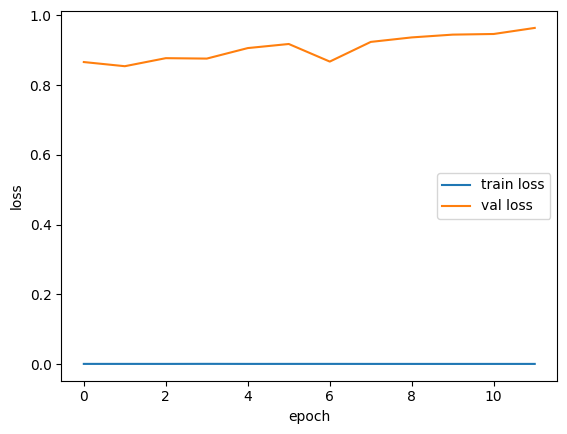

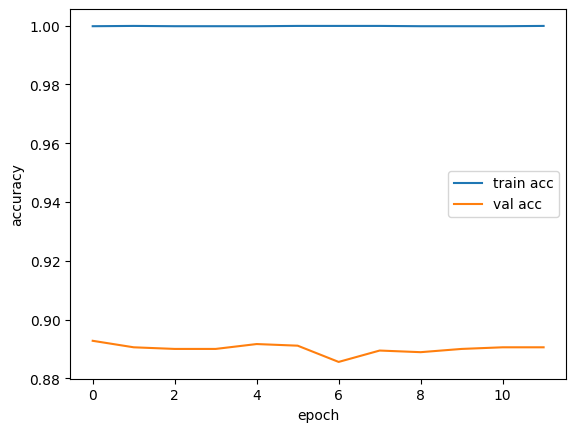

In [29]:
plt.plot(train_losses, label="train loss")
plt.plot(val_losses,   label="val loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.plot(train_accs, label="train acc")
plt.plot(val_accs,   label="val acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [30]:
model.eval()
all_targets = []
all_preds = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        yb = yb.to(device).view(-1, 1)

        logits = model(xb)
        probs = torch.sigmoid(logits)
        preds = (probs > 0.5).float()

        all_targets.append(yb.cpu())
        all_preds.append(preds.cpu())

all_targets = torch.cat(all_targets).view(-1).numpy()
all_preds   = torch.cat(all_preds).view(-1).numpy()

test_acc = accuracy_score(all_targets, all_preds)
print("Test accuracy (CNN):", test_acc)

cm = confusion_matrix(all_targets, all_preds)
print("Confusion matrix:")
print(cm)

print("\nClassification report:")
print(classification_report(all_targets, all_preds))

Test accuracy (CNN): 0.853
Confusion matrix:
[[1033  207]
 [ 234 1526]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82      1240
         1.0       0.88      0.87      0.87      1760

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



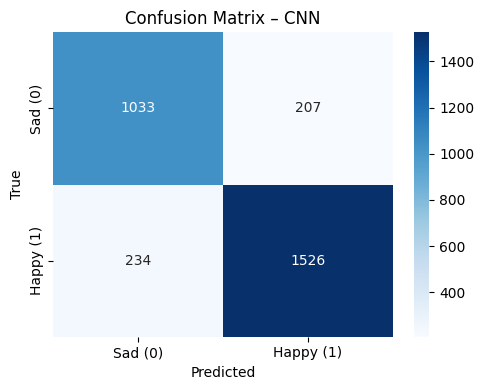

In [31]:
import seaborn as sns

labels = ["Sad (0)", "Happy (1)"]

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – CNN")
plt.tight_layout()
plt.show()